# Temp profile in AC: calculation and thermal stress estimation

First we need the different material input. 
Do you already have the final mixture, i.e. asphalt concrete (*acc*) properties?
If not, properties for both the asphalt cement (*ac*) and aggregate (*agg*) will be required to evaluate mix properties.

## Properties needed for **acc**, or **ac** & **agg**:
- $\lambda_{acc/ac/agg}$: volumetric coefficient of thermal contraction [1/C]
- $k_{acc/ac/agg}$: thermal conductivity [W/(m.K)]
- $\alpha_{acc/ac/agg}$: thermal diffusivity [m²/s]

In [1]:
import math
import cmath
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
#import matplotlib as mpl

In [2]:
#%matplotlib qt
%matplotlib inline

In [3]:
from func import paramin, indexin

In [4]:
mixture=str(input('Do you want to use the asphalt concrete properties (M)\n\
or separate properties for asphalt cement and aggregate (S) [default=S]?\n'))
default=str(input('Do you want to use default material properties? (Y/n)\n'))

if mixture=='m' or mixture=='M':
    if default=='n' or default=='N':
        lacc=paramin('linear coeff thermal contraction ACC [1/K] = ')
        kacc=paramin('thermal conductivity ACC [W/(m.K)] = ')
        aacc=paramin('thermal diffusivity ACC [m^2/s] = ')
    else:
               
        # ACC prop default values
        lacc=0.000345
        kacc=0.0021
        aacc=1.38
   
        #ambx1
#        lacc=2.01e-5
#        kacc=0.845
#        aacc=3.42e-7
        #ambx2
#        lacc=2.01e-5
#        kacc=0.845
#        aacc=4.66e-7

        #control
#        lacc=2.14e-5
#        kacc=1.013
#        aacc=5.17e-7
        
        #control-binder
#        lac=3.50e-4
#        kac=0.26
#        aac=1.28e-7

else:
    if default=='n' or default=='N':
        lac=paramin('linear coeff thermal contraction AC [1/K] = ')
        kac=paramin('thermal conductivity AC [W/(m.K)] = ')
        aac=paramin('thermal diffusivity AC [m^2/s] = ')
        lag=paramin('linear coeff thermal contraction Agg [1/K] = ')
        kag=paramin('thermal conductivity Agg [W/(m.K)] = ')
        aag=paramin('thermal diffusivity Agg [m^2/s] = ')
    else:
      
        # AC prop default values
        lac=0.000345
        kac=0.0021
        aac=1.38
        # Agg prop default values
        lag=0.0000095
        kag=0.003
        aag=1

        #ambx1-binder
#        lac=3.10e-4
#        kac=0.18
#        aac=8.29e-8
        #ambx2-binder
#        lac=3.10e-4
#        kac=0.18
#        aac=9.95e-8

        #control
#        lac=3.50e-4
#        kac=0.26
#        aac=1.28e-7

        #aggregates
#        lag=1.80e-5
#        kag=0.75
#        aag=3.55e-7        

Do you want to use the asphalt concrete properties (M)
or separate properties for asphalt cement and aggregate (S) [default=S]?

Do you want to use default material properties? (Y/n)



## Do you already have:
- $\text{VMA}$: intergranular void content in aggregate [%] ?
- $V_{eff}$: aggregate volume in mix [%] ?
- $B_{mix}$: linear coefficient of thermal contraction of asphalt mix [1/C] ?

> ### Then these mixture properties will be required as well as:
>> Asphalt mix layer thickness $z_{max}$ [cm]

## Mixture design information can also be used to calculate $\text{VMA}$, $V_{eff}$ and $B_{mix}$:
- $VMA=100-Gmb\cdot\frac{100-BC}{Gsb}$ [%]
- $V_{eff}=Gmb\cdot\left(\frac{100}{Gmm}-\frac{BC}{Gb}\right)$ [%]
- $B_{mix}=\frac{VMA\cdot\lambda_{ac}+V_{eff}\cdot\lambda_{ag}}{300}$ [1/C]

> ### In that case, the following mxture properties are needed:
>> - Gsb: aggregate bulk specific gravity
>> - Gb: binder specific gravity
>> - Gmm: asphalt mixture maximum specific gravity
>> - AC: Air void content [%vol.]
>> - BC: Binder content [%wt.]

In [5]:
#zmax=paramin('Asphalt mix layer thickness [cm] = ')
#zmax/=100 #zmax == layer thickness in [m]
zmax=12.5/100

mixprop=str(input('\nDo you already have VMA, Veff and Bmix? (Y/n)\n'))
default=str(input('Do you want to use default mixture properties? (Y/n)\n'))

if mixprop=='n' or mixture=='N':

    if default=='n' or default2=='N':
        gsb=paramin('Gsb aggregate bulk specific gravity = ')
        gb=paramin('Gb binder specific gravity = ')
        gmm=paramin('Gmm asphalt mixture maximum specific gravity =')
        av=paramin('Air volume [%] = ')
        bc=paramin('Binder content [%] = ')
    else:
        gsb=2.7
        gb=1.03
        gmm=2.5
        av=7
        bc=5
    
    gmb=(1-av/100)*gmm
    vma=round(100-gmb*(100-bc)/gsb,2)
    gse=(100-bc)/(100/gmm-bc/gb)
    veff=round(gmb*(100-bc)/gse,2)
    #veff=round(gmb*(100/gmm-bc/gb),2)
    bmix=(vma*lac+veff*lag)/300
    
    print('VMA intergranular void content in aggregate [%] = '+str(vma))
    print('Veff aggregate volume in mix [%] = '+str(veff))
    print('Bmix linear coefficient of thermal contraction of asphalt mix [1/C] = '+f'{bmix:.3e}')

else:
    if default=='n' or default=='N':
        vma=paramin('VMA  intergranular void content in aggregate [%] = ')
        veff=paramin('Veff aggregate volume in mix [%] = ')
        bmix=paramin('Bmix linear coefficient of thermal contraction of asphalt mix [1/C] = ')
    else:
        vma=18.19
        veff=81.71
        bmix=2.351e-05
        print('VMA intergranular void content in aggregate [%] = '+str(vma))
        print('Veff aggregate volume in mix [%] = '+str(veff))
        print('Bmix linear coefficient of thermal contraction of asphalt mix [1/C] = '+f'{bmix:.3e}')


Do you already have VMA, Veff and Bmix? (Y/n)

Do you want to use default mixture properties? (Y/n)

VMA intergranular void content in aggregate [%] = 18.19
Veff aggregate volume in mix [%] = 81.71
Bmix linear coefficient of thermal contraction of asphalt mix [1/C] = 2.351e-05


## Temperature input of our temperature profile model:
- Maximum surface temperature $T_{max}$ [ºC] 
- Maximum surface temperature $T_{min}$ [ºC] 
- Ambient air temperature $T_{amb}$ [ºC] 

In [6]:
#tmax=paramin('Max temperature [ºC]= ')
#tmin=paramin('Min temperature [ºC]= ')
#tamb=paramin('Ambient temperature [ºC]= ')
tmax=21
tmin=10
tamb=16

## Temperature profile estimation
1. Definition of complex integration constants P and M.
2. Definition of calculation time and steps.
3. Calculation of the thermal profile at the different depth along time.

### Discontinuity at the beginning of the model :
**Problematic? Simplifying hypothesis from the mathematical model > already source of errors?**

In [7]:
p=np.array([12.8377+1.66606j,12.8377-1.66606j,12.2261+5.01272j,12.2261-5.01272j,
            10.9343+8.40967j,10.9343-8.40967j,8.77643+11.9219j,8.77643-11.9219j,
            5.22545+15.7295j,5.22545-15.7295j])

m=np.array([-868.461+15457.4j, -868.461-15457.4j, 1551.63-8439.83j, 1551.63+8439.83j,
            -858.652+2322.07j, -858.652-2322.07j, 186.327-253.322j, 186.327+253.322j,
            -10.349+4.11094j, -10.349-4.11094j])

# We should always compute 2 days and eliminate the first day
# so we avoid the discontinuity.
tday=1 # number of days to compute
tday+=1
tstep=2 # time step (in hour)

dhours=tday*24
tdiscr=int(dhours/tstep+1)
time=np.linspace(0,dhours,tdiscr,dtype=float)

time[0]=1e-1 # change add by Qingwen because of div/0 at first instant (for each depth)

ztemp=zmax*100 # ztemp in [cm]

if int(ztemp)==ztemp:
    length=ztemp
else:
    length=int(ztemp)+1

zdiscr=2.5 # depth discretization in [cm]
    
z=np.arange(0,length+1,2.5,dtype=float) # rounded depth steps in [cm]
z[-1]=ztemp # real AC thickness value in [cm] at last element
zm=z/100 # rounded depth steps in [m]
zm[-1]=zmax # real AC thickness value in [m] at last element

ftemp=np.zeros((len(time),len(zm)))

for i in range(len(time)):
    for k in range(len(zm)):
        ttemp=0
        for j in range(len(p)):
            temp0=p[j]/time[i] # here is the 0 div by time[0]
            
            if mixture=='m' or mixture=='M':
                r1=cmath.sqrt(temp0/kacc)
                mixprop=aacc*r1
            else:
                r1=cmath.sqrt(temp0/kac)  # relaciona con cemento asfaltico
                r2=cmath.sqrt(temp0/kag)  # relaciona con agregado
                mixprop=(aac*r1)/(aag*r2) # relaciona ambos
            
            ldiv=(1+mixprop.real)/(1-mixprop.real)
            
            fs=((tmax+tmin)/2)/temp0+(6*math.pi*(tmax-tmin))/(144*temp0**2+math.pi**2)
            a=(fs-tamb/temp0)/(1-ldiv*cmath.exp(2*zmax*r1))
            b=cmath.exp(zm[k]*r1)-ldiv*cmath.exp((2*zmax-zm[k])*r1)
            
            U=a*b
            FFs=temp0*U
            out=m[j]*FFs
            
            ttemp=ttemp+out.real
            
        ftemp[i,k]=ttemp+tamb

## Plot temperature variation with time at different depth

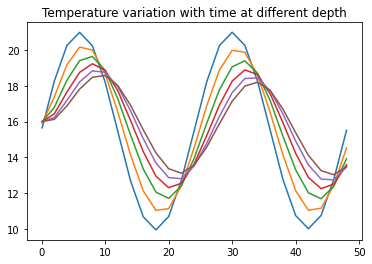

In [8]:
exportftemp=pd.DataFrame(ftemp,index=[time],columns=[z])
filepath = 'export.xlsx'
#exportftemp.to_excel(filepath,index=True,header=True)

time2=time[int(24/tstep):]-24 # Recover only second day and correct time stamp
ftemp2=ftemp[int(24/tstep):,:] # Avoid discontinuity due to div/0

for k in range(len(z)):
    plt.plot(time[int(tstep*0):],ftemp[int(tstep*0):,k])
    #plt.plot(time2,ftemp2)
    
plt.title('Temperature variation with time at different depth')
plt.show()

## Extract temperature profile in function of depth at a given time

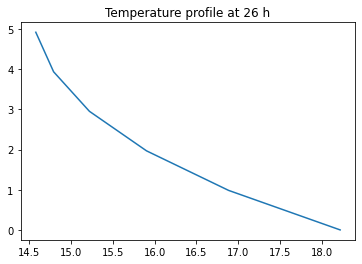

In [9]:
ttime=26 # Hour at which you want the thermal profile

#plt.plot(z,ftemp[int(ttime/tstep),:]) # Temp vs Depth
#plt.plot(ftemp[int(ttime/tstep),:],z) # Depth vs Temp
plt.plot(ftemp[int(ttime/tstep),:],z*0.3937008) # Depth_inches vs Temp

#plt.plot(z,ftemp2[int(ttime/tstep),:]) # Without 1st day

plt.title('Temperature profile at '+str(ttime)+' h')
plt.show()

## Import of Creep(temperature,time) data using Pandas
Direct importation from Excel model

In [10]:
icreep=['temp_C','time_s','compliance_gpa']

excelin=pd.read_excel (r'creep_compliance.xlsx')
excelin.columns=[icreep[0],icreep[1],icreep[2]]

excelin

,temp_C,time_s,compliance_gpa
0,-20,1,0.045229
1,-20,2,0.046810
2,-20,5,0.049365
3,-20,10,0.051892
4,-20,20,0.055146
5,-20,50,0.059798
6,-20,100,0.064649
7,-20,200,0.070221
8,-20,500,0.079147
9,-20,1000,0.086293


## Import of Creep(temperaure,time) data using Pandas
Importation from clipboard and redefinition of columns distribution

Different plots from creep data:
1. creep vs time
2. log10(creep) vs log10(time)

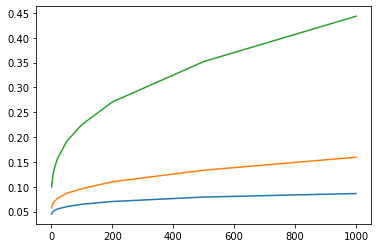

In [11]:
temparray=excelin.iloc[:,0].unique()

for k in temparray:
    tempselection=excelin[excelin.iloc[:,0]==k]
    plt.plot(tempselection.iloc[:,1],tempselection.iloc[:,2])
    
plt.show()

Optimization of 2nd order polynomial function onto log-log creep(time) data

polyfit parameters = [ 0.01676201  0.04407328 -1.34491681]
R² = 0.9998060648489542
polyfit parameters = [ 0.03243473  0.04650782 -1.23461393]
R² = 0.9992986054868952
polyfit parameters = [ 0.03841515  0.10020483 -1.00151198]
R² = 0.9999708182973699


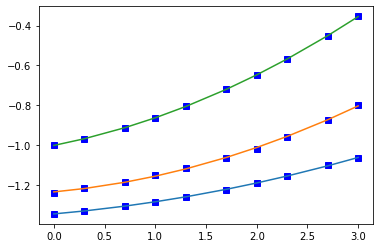

In [12]:
i=0
polyA=np.zeros((len(temparray),3))

def polylogJ(x,u,v,w):
    # define the function to optimize on log(J)-log(t) data
    return u*x**2+v*x+w

for k in temparray:
    tempselection=excelin[excelin.iloc[:,0]==k]
    t=np.log10(tempselection.iloc[:,1])
    CC=np.log10(tempselection.iloc[:,2])
        
    ppolyCC,pcov=curve_fit(polylogJ,t,CC)
    polyA[i,:]=ppolyCC
    CCcalc=polylogJ(t,*ppolyCC)
    print('polyfit parameters = '+str(ppolyCC))
    
    residuals=CC-CCcalc
    ss_res=np.sum(residuals**2)
    ss_tot=np.sum((CC-np.mean(CC))**2)
    r_squared=1-(ss_res/ss_tot)
    print('R² = '+str(r_squared))
    #standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov))
    #print('a =', popt[0], '+/-', pcov[0,0]**0.5)
    #print('b =', popt[1], '+/-', pcov[1,1]**0.5)
    
    plt.plot(t,CC,'bs')
    plt.plot(t,CCcalc)
    i+=1
    
plt.show()

## Tref & shift
1. Chose the reference temperature
2. Calculation of mean shift to apply on other temperature data

In [13]:
tref=int(input('Chose between one the following temperature as reference temperature Tref '+str(temparray)+'\n'))
trefInd=np.where(temparray==tref)
trefInd=int(trefInd[0])
temparray2=np.delete(temparray,trefInd)

i=0
xmean=np.zeros(len(temparray2))

for k in temparray2:
    tempselection=excelin[excelin.iloc[:,0]==k]
    t=np.log10(tempselection.iloc[:,1])
    CC=np.log10(tempselection.iloc[:,2])
    
    shift=(-polyA[trefInd,1]+np.sqrt(polyA[trefInd,1]**2-4*polyA[trefInd,0]*(polyA[trefInd,2]-CC)))/(2*polyA[trefInd,0])
    xshift=t-shift
    
    xmean[i]=np.mean(xshift)
    i+=1
    
print(xmean)

Chose between one the following temperature as reference temperature Tref [-20 -10   0]
-20
[-1.38979493 -3.30530378]


3. Shift realized using the "Equivalent Slope Method" from [Saboo]
4. Plot the Creep Compliance Master Curve (CCMC) using this shifting method

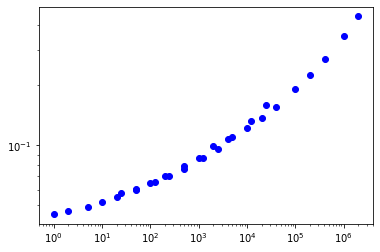

In [14]:
logtr=np.zeros(len(excelin.iloc[:,0]))
tr=np.zeros(len(excelin.iloc[:,0]))

for k in range(len(tr)):
    if excelin.iloc[k,0]==tref:
        logtr[k]=np.log10(excelin.iloc[k,1])
    for tt in range(len(temparray2)):
        if excelin.iloc[k,0]==temparray2[tt]:
            logtr[k]=np.log10(excelin.iloc[k,1])-xmean[tt]

tr=10**(logtr)
J=excelin.iloc[:,2]
logJ=np.log10(J)

plt.plot(tr,J,'bo')
plt.yscale('log')
plt.xscale('log')
plt.show()

## Optimize log(aT) - WLF model - function
> Recover parameters plogat[0] and plogat[1]

log(at) parameters = [ 7322.52089992 45745.88541045]
R² = -1.7372495943890773


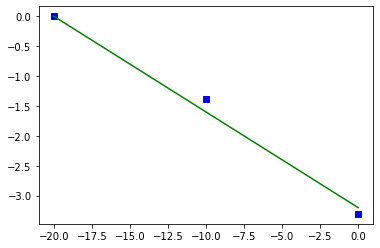

In [15]:
ylogat=np.append(xmean,0)
temparray3=np.append(temparray2,tref)

def logat(x,u,v):
    # log(at) function
    return -u*(x-tref)/(v+x-tref)

plogat,pcov=curve_fit(logat,temparray3,ylogat,bounds=(0,np.inf),method='trf')
print('log(at) parameters = '+str(plogat))

logatcalc=logat(temparray,*plogat)

residuals = ylogat- logatcalc
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ylogat-np.mean(ylogat))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R² = '+str(r_squared))

plt.plot(temparray3,ylogat,'bs')
plt.plot(temparray,logatcalc,'g-')
plt.show()

## Optimize Prony Serie onto CCMC
> parameters paramJ[0]=J0 ; paramJ[1:2]={J1;tau1} ... ; paramJ[-1]=$\frac{1}{\eta_f}$

How many terms of the Prony serie do you want to use to model the CCMC?
 n = 6
Prony J serie parameters = [4.44601436e-02 7.91789134e-02 5.23260125e+00 1.00969002e-02
 1.01046513e+00 5.14747738e-02 4.01676858e+00 2.28759235e-02
 2.92555063e+00 1.01471935e-02 1.95323229e+00 4.18609820e-01
 6.41842057e+00 7.86331314e-15]
R² = 0.9990779885690916


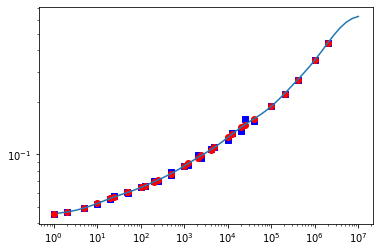

In [16]:
CC={'tr':tr,'J':J}
CCMC=pd.DataFrame(data=CC)
CCMC.sort_values(by=['tr'], inplace=True)
ttr=np.array(CCMC.iloc[:,0])
JJ=np.array(CCMC.iloc[:,1])

def make_pronyJ(nn):
    def pronyJ(x,*p):
        prony=p[0]
        for i in range(1,2*nn,2):
            prony+=p[i]*(1-np.exp(-x/10**p[i+1]))
        prony+=x*p[2*nn+1]
        return prony
    return pronyJ

nn=int(input('How many terms of the Prony serie do you want to use to model the CCMC?\n n = '))
fit_pronyJ=make_pronyJ(nn)

paramJ,pcov=curve_fit(fit_pronyJ,ttr,JJ,p0=[0.0]*(2*nn+2),bounds=(0,np.inf),method='trf')
print('Prony J serie parameters = '+str(paramJ))

Jcalc=fit_pronyJ(ttr,*paramJ)

residuals = JJ-Jcalc
ss_res = np.sum(residuals**2)
ss_tot = np.sum((JJ-np.mean(JJ))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R² = '+str(r_squared))

tsim=np.logspace(0.1,7,50)
Jsim=fit_pronyJ(tsim,*paramJ)

plt.plot(ttr,JJ,'bs')
plt.plot(ttr,Jcalc,'ro')
plt.plot(tsim,Jsim)
plt.yscale('log')
plt.xscale('log')
plt.show()

## Interconvertion CCMC > E* Master Curve (EMC) [Park1999]
## Optimization of Prony Series onto EMC
> parameters paramE[0]=Gg ; paramE[1:2]={G1;tauG1} ...

How many terms of the Prony serie do you want to use to model the Dynamic Modulus E*?
 n = 10
Prony E serie parameters = [22.46539037  2.51832121  6.00245773  2.35837665  5.09501295  0.73687042
  4.40107779  0.84539055  2.36026895  0.83962485  0.65882028  3.29800066
  2.84842734  3.12004009  3.89257545  0.88057089  3.41339964  3.39152142
  1.00611185  2.55810632  1.86036442]
R² = 0.9999999977158099


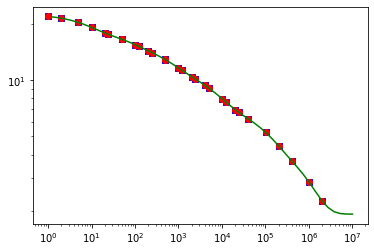

In [17]:
def make_dpronyJ(nn):
    def dpronyJ(x,*p):
        dprony=0
        for i in range(1,2*nn+1,2):
            dprony+=(p[i]/10**p[i+1])*np.exp(-x/10**p[i+1])
        dprony+=p[2*nn+1]
        return dprony
    return dpronyJ

dpronyJ1=make_dpronyJ(nn)
dpronyJ=dpronyJ1(ttr,*paramJ)

n=dpronyJ/(ttr*Jcalc)
alpha=(np.sin(n*np.pi)/(n*np.pi))**(1/n)
Dtalpha=fit_pronyJ(ttr/alpha,*paramJ)
E=1/Dtalpha

def make_pronyE(nn):
    def pronyE(x,*p):
        prony=p[0]
        for i in range(1,2*nn,2):
            prony+=p[i]*(np.exp(-x/10**p[i+1])-1)
        return prony
    return pronyE

nn2=int(input('How many terms of the Prony serie do you want to use to model the Dynamic Modulus E*?\n n = '))
fit_pronyE=make_pronyE(nn2)

paramE,pcov=curve_fit(fit_pronyE,ttr,E,p0=[0.0]*(2*nn2+1),bounds=(0,np.inf),method='trf')
print('Prony E serie parameters = '+str(paramE))

Ecalc=fit_pronyE(ttr,*paramE)

residuals = E-Ecalc
ss_res = np.sum(residuals**2)
ss_tot = np.sum((E-np.mean(E))**2)
r_squared = 1 - (ss_res / ss_tot)
print('R² = '+str(r_squared))

Esim=fit_pronyE(tsim,*paramE)

plt.plot(ttr,E,'bs')
plt.plot(ttr,Ecalc,'ro')
plt.plot(tsim,Esim,'g')
plt.yscale('log')
plt.xscale('log')
plt.show()

## Import of E*(frequency,temp) data using Pandas
Direct importation from Excel model

## Different plots from Edyn data:
1. Edyn vs frequency
2. Edyn vs time
3. log10(Edyn) vs log10(time)

## Optimization of 1st order polynomial function (linear) onto log-log E*(time) data

## Tref & shift
1. Chose the reference temperature
2. Calculation of mean shift to apply on other temperature data

3. Shift realized using the "Equivalent Slope Method" from [Saboo]
4. Plot the Dynamic Modulus Master Curve (DMMC/EMC) using this shifting method

## Optimization of Prony Series onto EMC
> parameters paramEdyn[0]=Gg ; paramEdyn[1:2]={G1;tauG1} ...

## Linear interpolation and small discretization of time-temperature evolution

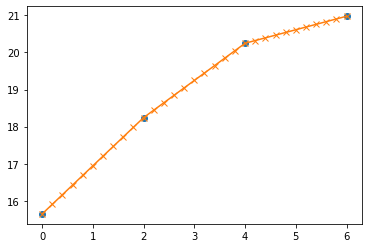

In [18]:
tinterp=np.linspace(0,time[-1],(len(time)-1)*10+1)
#tinterp[0]=time[0]
tinterp[0]=1e-4

Tinterp=np.zeros((len(tinterp),len(z)))

time0=time
time0[0]=0

for k in range(len(z)): Tinterp[:,k]=np.interp(tinterp,time0,ftemp[:,k])

plt.plot(time[0:4],ftemp[0:4,0],'o')
plt.plot(tinterp[0:31],Tinterp[0:31,0],'-x')
plt.show()

In [19]:

# WRONG > QINGWEN CHANGED IT
def ilogat(x,u,v):
    # -1/logat function! And confusion in C1/C2 param position
    return (u+x-tref)/(v*(x-tref))
    #return (v+x-tref)/(u*(x-tref)) # correction of the switch between C1 & C2 param


lat=logat(Tinterp,*plogat)
tsec=tinterp*3600

Xi=np.zeros((len(tinterp),len(z)))
Xdelta=np.zeros((len(tinterp)-1,len(z)))
Tdexi=np.zeros((len(tinterp)-1,len(z)))
Xstep=np.zeros((len(tinterp)-1,len(z)))

for k in range(len(z)):
     
    # WRONG > QINGWEN CHANGED IT
    # > log(tsec)-log(10)=log(tsec/10)!=log10(tsec)
    #Xi[:,k]=10**(np.log(tsec)-np.log(10)-lat[:,k])
    # > log10(tsec)=log(tsec)/log(10)
    #Xi[:,k]=10**(np.log(tsec/10)-lat[:,k])
    
    
    Xi[:,k]=10**(np.log10(tsec)-lat[:,k]) 
    
    Xdelta[:,k]=np.diff(Xi[:,k])
    Tdexi[:,k]=np.diff(Tinterp[:,k])/Xdelta[:,k]
    Xstep[:,k]=np.int_(Xdelta[:,k]/10)

tstress=int(input('Time you want to plot [h]?\n tstress ='))

stress=np.zeros((len(z)))

'''
for tt in range(len(tinterp)):
    if tstress>=tinterp[tt]:
        for zz in range(len(z)):
            #for k in range(int(Xstep[tt,zz])):
            for k in range(1):
                if Xdelta[tt,zz] > 0:
                    stress[zz]=+fit_pronyE((Xi[tt+1,zz]-k*10),*paramE)*Tdexi[tt,zz]*10*bmix
                else:
                    stress[zz]=+fit_pronyE((Xi[tt+1,zz]+k*10),*paramE)*Tdexi[tt,zz]*10*bmix
    else: break
'''

#Faster integration test > avoid looping on condition
        
for tt in range(len(tinterp)):
    if tstress>=tinterp[tt]:
        for zz in range(len(z)):
            c=1
            if Xdelta[tt,zz]>0: c=-1
            #for k in range(int(Xstep[tt,zz])):
            for k in range(1):
                stress[zz]=+fit_pronyE((Xi[tt+1,zz]+c*k*10),*paramE)*Tdexi[tt,zz]*10*bmix
    else: break

print('\nThermal stress values at different depth [psi]:\n'+str(stress))
print('\nSteps to compute for 2h stress calculation:\n'+str(Xstep[0:tt,0]))

Time you want to plot [h]?
 tstress =2

Thermal stress values at different depth [psi]:
[5.20934149e-14 6.78343810e-14 7.62377789e-14 7.59574600e-14
 6.93898651e-14 6.03055565e-14]

Steps to compute for 2h stress calculation:
[3.98486000e+07 4.78599680e+07 5.70550420e+07 6.76125410e+07
 7.97131840e+07 9.35602270e+07 1.09382161e+08 1.27435735e+08
 1.48009317e+08 1.71426659e+08 1.73447670e+08]


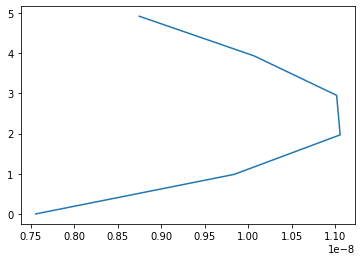

In [20]:
# Comparison w/ Qingwen : GPa > PSI & cm > in
plt.plot(stress*145038,z*0.3937008)
plt.show()

In [21]:
# Check on Xdelta values > if all false then any(Xdelta)=False

check=np.ones(zz,dtype='bool')

Xdelta[6,3]=-5

for k in range(zz):
    check[k]=any(Xdelta[:,k]<=0)

# if all check[k] false, then any(check)=False / if there's 1 Xdelta value <=0, then any(check)=True
print(any(check))

True
